In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import seaborn as sns
import numpy as np
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt

sys.path.append('../experimental_sripts')

sys.path.append('/home/Container/tgnn/scripts/Models/BGNN_extended.py')

import pandas as pd
import json

from run import aggregate_results, get_name

Using backend: pytorch


In [4]:
def get_best_name(seed_results, seed, pattern=None, bgnn_style=False):
    res = seed_results[seed]
    if pattern is not None:
        res = {x: res[x] for x in filter(lambda x: pattern in x, res)}
            
    if bgnn_style:
        return min(res, key=lambda x: res[x][0][1])
    return min(res, key=lambda x: res[x][1])

In [5]:
with open('/home/Container/tgnn/scripts/experimental_sripts/results2/bgnn_pre_learning/seed_results.json', 'r') as fp:
    bgnn_not_pre_learned_seed = json.load(fp)

with open(f'../experimental_sripts/results2/bgnn_pre_learning/0/{get_best_name(bgnn_not_pre_learned_seed, "0", "only_gbdtTrue", bgnn_style=True)}.txt', 'r') as fp:
    bgnn_not_pre_learned_loss = fp.readline()
    bgnn_not_pre_learned_loss = np.array(eval(' '.join(bgnn_not_pre_learned_loss.split()[1:])))

In [6]:
with open('/home/Container/bgnn/results/house/26_02/seed_results.json', 'r') as fp:
    bgnn_seed = json.load(fp)
    
with open(f'/home/Container/bgnn/results/house/26_02/0/{get_best_name(bgnn_seed, "0", bgnn_style=True)}.txt', 'r') as fp:
    bgnn_loss = fp.readline()
    bgnn_loss = np.array(eval(' '.join(bgnn_loss.split()[1:])))

In [7]:
with open('../experimental_sripts/results2/house/MGBDT/MGBDT-loss_test.json', 'r') as fp:
    MGBDT_results_prev = np.array(json.load(fp))

In [8]:
with open('../experimental_sripts/mgbdt_results/MGBDT-loss_test.json', 'r') as fp:
    MGBDT_results = np.array(json.load(fp))

In [9]:
sns.set()

In [10]:
def put_data_to_dict(loss, dicct, isgnn=False, name=None):
    data_to_draw = dicct
#     import pdb; pdb.set_trace()
    n = len(loss)
    data_to_draw['x'] += list(range(len(loss)))
    data_to_draw['y']+= list(loss[:, 2])
    data_to_draw['name'] += [name]*n
    data_to_draw['prelearned'] += [isgnn]*n

In [11]:
data_to_draw=defaultdict(list)

In [12]:
put_data_to_dict(MGBDT_results, data_to_draw, isgnn=True, name='MGBDT')
put_data_to_dict(MGBDT_results_prev, data_to_draw, isgnn=False, name='MGBDT')
put_data_to_dict(bgnn_loss, data_to_draw, isgnn=True, name='BGNN')
put_data_to_dict(bgnn_not_pre_learned_loss, data_to_draw, isgnn=False, name='BGNN')

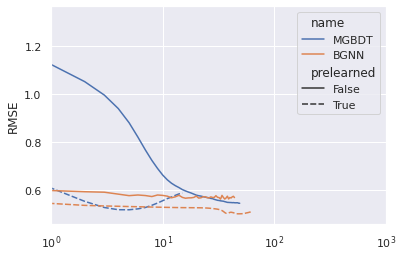

In [13]:
# plt.figure(figsize=(15,10))
sns.lineplot(data=data_to_draw, x='x', y='y', hue='name', style='prelearned')
plt.xlim(1e0, 1e3)
# plt.ylim(0.4, 2.0)
plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('')
plt.savefig('/home/Container/pics/Pre_learning.pdf', format='pdf', bbox_inches='tight')

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

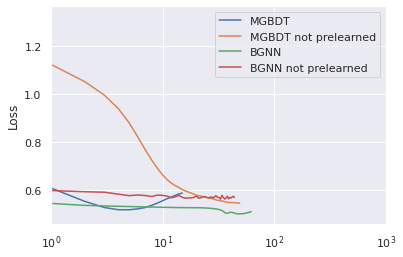

In [10]:
x = np.arange(len(MGBDT_results))
y = MGBDT_results[:,2]
sns.lineplot(x,y, label='MGBDT')

y = MGBDT_results_prev[:,2]
x = np.arange(len(MGBDT_results_prev))
sns.lineplot(x,y, label='MGBDT not prelearned')

x = np.arange(len(bgnn_loss))
y = bgnn_loss[:,2]
sns.lineplot(x,y, label='BGNN')

x = np.arange(len(bgnn_not_pre_learned_loss))
y = bgnn_not_pre_learned_loss[:,2]
sns.lineplot(x,y, label='BGNN not prelearned')

plt.xlim(1e0, 1e3)
plt.xscale('log')
plt.ylabel('Loss')
plt.savefig('/home/Container/pics/Pre_learning.pdf', format='pdf', bbox_inches='tight')